<a href="https://colab.research.google.com/github/Kartika014/Kartika014/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aerofit - Descriptive Statistics & Probability**


Let's first understand the problem statement.
* Use case: The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. Basically on the basis of target audiance product could be sold more efficiently so let's import the data and understand what could be done for further process.



*   Product Purchased:	KP281, KP481, or KP781 (datatype: String)
*   Age:	In years (datatype: integer)
*   Gender:	Male/Female (dataype: string)
*   Education:	In years (datatype : integer)
*   MaritalStatus:	Single or partnered (datatype : string)
*   Usage:	The average number of times the customer plans to use the treadmill each week.(datatype : integer)
*   Income:	Annual income (in $) (datatype : integer)
*   Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.(datatype : integer)
*   Miles:	The average number of miles the customer expects to walk/run each week (datatype : integer)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
url = '/content/drive/MyDrive/DSML/Aerofit  Business case/aerofit.csv'.format("1qk73xG5Fa2NQ2Tx5mSXXdouHVqzeHBgg")
df = pd.read_csv(url)

In [ ]:
df
# length of the data is 180

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Here we can clearly see that all the columns have no null values and even we can check the datatype of the column.

* I have utilised a variety of functions to learn about the data's information, such as the datatype, unique items in the columns, and the number of columns with null values.

* Most importantly when i unlisted the column of product i came to know that there are in total 3 product and on the top of that how much is the count of per product present in our data.

* Even after describing the data i came to know about mean, std devaiation, percentile(25,50,75) for columns which are integer type. This will help us in understanding the statistical summary of the data.

In [ ]:
# This will help us understand the datatype of the column
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
# how many unique values
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
#checking null values in every column of our data
df.isnull().sum()

# as we see that there is no null value

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
# Here we are checking the occurance of each product
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
df.describe()
# here we can clearly understand the statistical summary of the data

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include = object)
# from here we can understand the columns are string type

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107



# Univariate & Bi-variate Analysis

<!-- * Q1 - How many female/male has bought
* Q2 - Which age has bought the highest
* Q3 - How martialStatus depends on buying of a customer
* Q4 -  How income has affected the buying trend
* Q5 - How much fit a person is and which machine he/she bought? -->

In [ ]:
category = df["Gender"].value_counts().reset_index()
category

,index,Gender
0,Male,104
1,Female,76


Insight: In general males prefer to buy tredmil. So somehow or the other we can target more males instead of females like if we want to sell that in a gym, we can prefer to sell that in a males gym or the area where more males are there.

In [ ]:
arr_new = np.empty(shape = df["Fitness"].shape,dtype="U50")
# created a new array like a hashtable and make the categorization based on the data of fitness number
arr_new[df["Fitness"] == 1] = "Poor"
arr_new[df["Fitness"] == 5] = "Excellent"
arr_new[(df["Fitness"] >= 2) & (df["Fitness"] <= 4)] = "Neutral"
arr_new
# now let's append this data into the original data frame (using to list we can easily do that)
df['fitness_card'] = arr_new.tolist()
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_card
0,KP281,18,Male,14,Single,3,4,29562,112,Neutral
1,KP281,19,Male,15,Single,2,3,31836,75,Neutral
2,KP281,19,Female,14,Partnered,4,3,30699,66,Neutral
3,KP281,19,Male,12,Single,3,3,32973,85,Neutral
4,KP281,20,Male,13,Partnered,4,2,35247,47,Neutral
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent
176,KP781,42,Male,18,Single,5,4,89641,200,Neutral
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent


In [ ]:
# Let's understand the trend based on how male have used all the products
data = df.copy()
df_male_mask = data[data["Gender"] == "Male"]
df_male_mask

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_card
0,KP281,18,Male,14,Single,3,4,29562,112,Neutral
1,KP281,19,Male,15,Single,2,3,31836,75,Neutral
3,KP281,19,Male,12,Single,3,3,32973,85,Neutral
4,KP281,20,Male,13,Partnered,4,2,35247,47,Neutral
7,KP281,21,Male,13,Single,3,3,32973,85,Neutral
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent
176,KP781,42,Male,18,Single,5,4,89641,200,Neutral
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent


<Axes: xlabel='Income', ylabel='Count'>

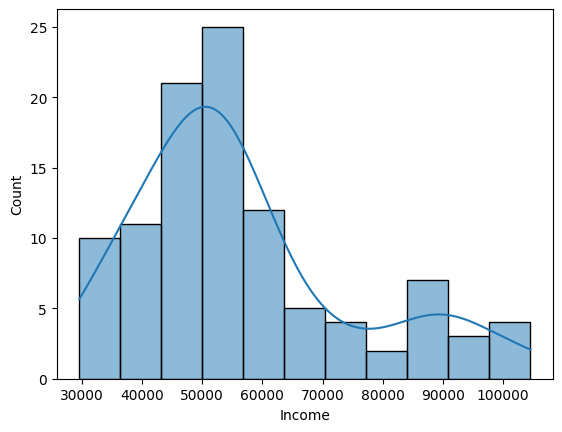

In [ ]:
sns.histplot(data=df_male_mask, x="Income", kde=True)

Insights: After looking at the trend we can easily justify that who are having annual income 50000 have bought the tredmill more.


<Axes: xlabel='Age', ylabel='Count'>

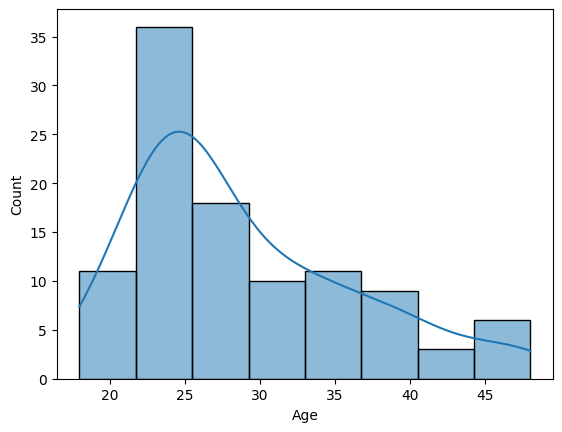

In [ ]:
sns.histplot(data=df_male_mask, x="Age", kde=True)

Insights: Maximum adults have bought tredmill. we can target more adults rather than old people.

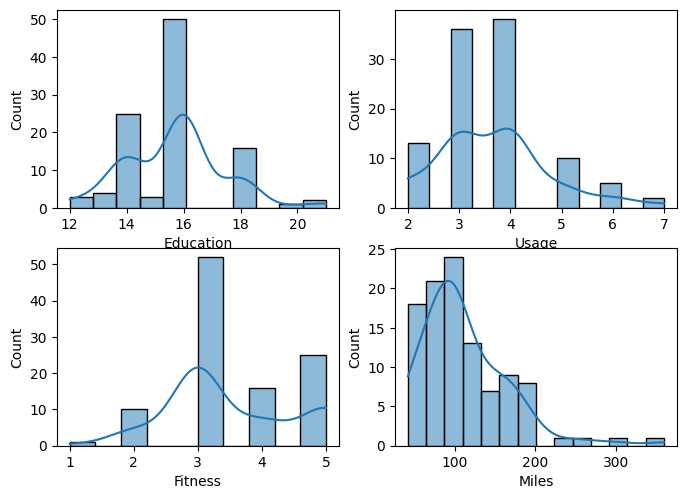

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 4))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df_male_mask, x="Education", kde=True, ax=axis[0,0])
sns.histplot(data=df_male_mask, x="Usage", kde=True, ax=axis[0,1])
sns.histplot(data=df_male_mask, x="Fitness", kde=True, ax=axis[1,0])
sns.histplot(data=df_male_mask, x="Miles", kde=True, ax=axis[1,1])
plt.show()

Insights:

* Males with 16 years of experience tend to buy more.
* Males using th product 3 to 4 times a week tend to buy more.
* males with neutral fitness tend to buy more
* On average 100 number of miles is most preferred by males each week

 Based on all these insights, if some A person comes so we can undertand how much passoniate he is to buy a tredmill. (Only male data)



<Axes: title={'center': 'Count of usage by males'}, xlabel='Product', ylabel='count'>

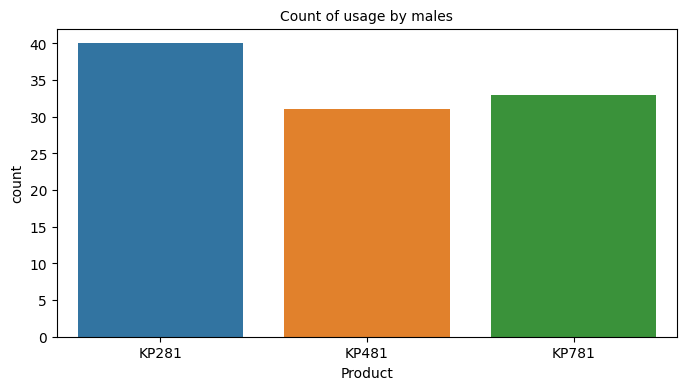

In [ ]:
# count of male per product
data_male = df_male_mask.groupby(["Product","Gender"]).size().reset_index()
data_male.rename(columns = {0:"count"},inplace = True)
data_male
plt.figure(figsize=(8,4))
plt.title("Count of usage by males",fontsize=10)
sns.countplot(x = df_male_mask["Product"])

Insight: KP281 is the product which is most preferred by males

In [ ]:
# lets understand how males use the products on weekly basis.
data_male = df_male_mask.groupby(["Usage","Product"]).size().reset_index()
data_male.rename(columns = {0:"count"},inplace = True)
data_male = data_male.sort_values(by=['count'],ascending=False)[:5]
data_male

,Usage,Product,count
2,3,KP281,18
3,3,KP481,17
7,4,KP781,16
5,4,KP281,15
9,5,KP781,9


Insight: In total more males prefer to take KP281 where they may use  3 or 4 times in a week. Basically these are top 5 usage count for product wise data

In [ ]:
data_marital = df_male_mask.groupby(["Usage","MaritalStatus"]).size().reset_index()
data_marital.rename(columns = {0:"count"},inplace = True)
data_marital = data_marital.sort_values(by=['count'],ascending=False)[:5]
data_marital

,Usage,MaritalStatus,count
4,4,Partnered,22
2,3,Partnered,21
5,4,Single,16
3,3,Single,15
0,2,Partnered,9


<Axes: title={'center': 'Count of usage by males by Marital status'}, xlabel='MaritalStatus', ylabel='count'>

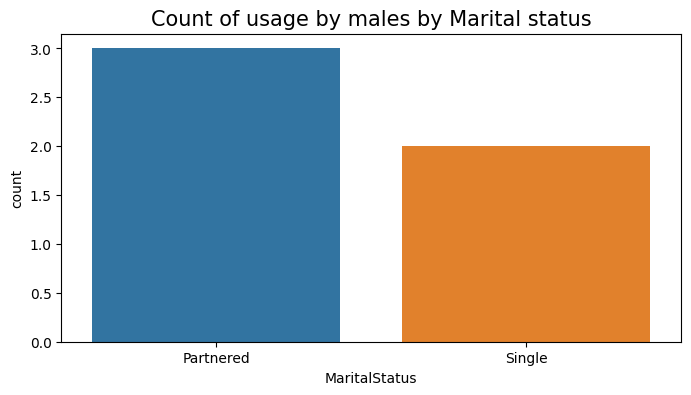

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Count of usage by males by Marital status",fontsize=15)
sns.countplot(x = data_marital["MaritalStatus"])

Insights: Here we can clearly depict that most of the males who are married are using the treadmill more frequently with a usage of 3-4 times in a week.

In [ ]:
data_fitness = df_male_mask.groupby(["Usage","Fitness"]).size().reset_index()
data_fitness.rename(columns = {0:"count"},inplace = True)
data_fitness = data_fitness.sort_values(by=['count'],ascending=False)[:5]
data_fitness

,Usage,Fitness,count
4,3,3,27
8,4,3,18
10,4,5,12
1,2,3,7
0,2,2,6


In [ ]:
arr_new = np.empty(shape = df["Fitness"].shape,dtype="U50")
# created a new array like a hashtable and make the categorization based on the data of fitness number
arr_new[df["Fitness"] == 1] = "Poor"
arr_new[df["Fitness"] == 5] = "Excellent"
arr_new[(df["Fitness"] >= 2) & (df["Fitness"] <= 4)] = "Neutral"
arr_new
# now let's append this data into the original data frame (using to list we can easily do that)
df['fitness_card'] = arr_new.tolist()
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_card
0,KP281,18,Male,14,Single,3,4,29562,112,Neutral
1,KP281,19,Male,15,Single,2,3,31836,75,Neutral
2,KP281,19,Female,14,Partnered,4,3,30699,66,Neutral
3,KP281,19,Male,12,Single,3,3,32973,85,Neutral
4,KP281,20,Male,13,Partnered,4,2,35247,47,Neutral
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent
176,KP781,42,Male,18,Single,5,4,89641,200,Neutral
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent


In [ ]:
# After converting it into some fitness card, we will understand fitness is connected with usage
data_fitness = df_male_mask.groupby(["fitness_card","Usage"]).size().reset_index()
data_fitness.rename(columns = {0:"count"},inplace = True)
data_fitness = data_fitness.sort_values(by=['count'],ascending=False)[:]
data_fitness

,fitness_card,Usage,count
6,Neutral,3,34
7,Neutral,4,26
5,Neutral,2,13
1,Excellent,4,12
2,Excellent,5,6
3,Excellent,6,4
8,Neutral,5,4
4,Excellent,7,2
0,Excellent,3,1
9,Neutral,6,1


Here I have made a score card for knowing that how is fitness impacting the other person.

* Poor when fitness == 1
* Neutral when fintness == 2,3,4
* Excellent when fitness ==  5

Insights: So as we see males with neutral fitness has maximum count in that case we can refer tredmill to people(male) who carry neutral fitness

In [ ]:
data_miles = df_male_mask.groupby(["Miles","Usage"]).size().reset_index()
data_miles.rename(columns = {0:"count"},inplace = True)
data_miles = data_miles.sort_values(by=['count'],ascending=False)[:5]
data_miles

,Miles,Usage,count
14,85,3,11
17,95,3,8
18,100,4,5
16,94,4,4
12,75,3,3


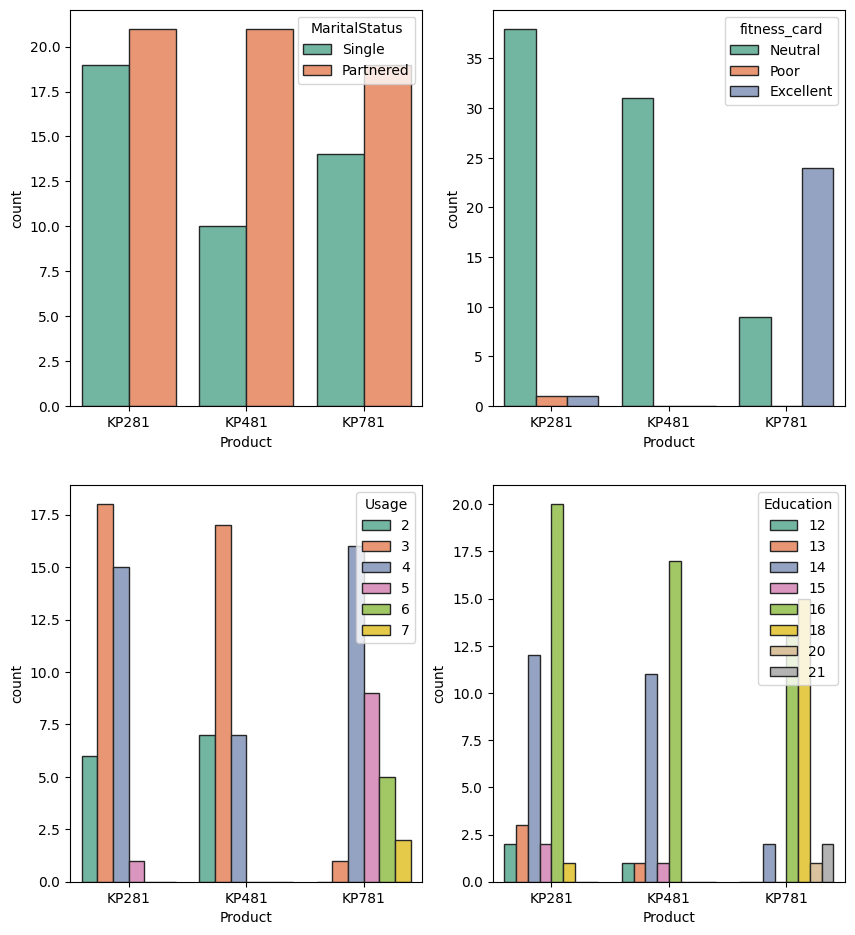

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.subplots_adjust(top=1.2)
sns.countplot(data=df_male_mask, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set2', ax=axis[0,0])
sns.countplot(data=df_male_mask, x='Product', hue='fitness_card', edgecolor="0.15", palette='Set2', ax=axis[0,1])
sns.countplot(data=df_male_mask, x='Product', hue='Usage', edgecolor="0.15", palette='Set2', ax=axis[1,0])
sns.countplot(data=df_male_mask, x='Product', hue='Education', edgecolor="0.15", palette='Set2', ax=axis[1,1])
plt.show()

Insights:
* males who are married tend to buy KP281,KP481 than unmarried.
* Maximum males with neutral fitness prefer KP281 and KP481
* There are higher chance that males who tend to use the tredmill 3 times a week may buy KP281 and KP481
* males having 16 years of eduction tend to buy tredmill

Hence we can say that KP281 and KP481 is most preferred product (as per the analytics).

**Let's unlist females category as I did for males**

In [ ]:
df_female_mask = data[data["Gender"] == "Female"]
df_female_mask

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_card
2,KP281,19,Female,14,Partnered,4,3,30699,66,Neutral
5,KP281,20,Female,14,Partnered,3,3,32973,66,Neutral
6,KP281,21,Female,14,Partnered,3,3,35247,75,Neutral
9,KP281,21,Female,15,Partnered,2,3,37521,85,Neutral
11,KP281,22,Female,14,Partnered,3,2,35247,66,Neutral
...,...,...,...,...,...,...,...,...,...,...
152,KP781,25,Female,18,Partnered,5,5,61006,200,Excellent
157,KP781,26,Female,21,Single,4,3,69721,100,Neutral
162,KP781,28,Female,18,Partnered,6,5,92131,180,Excellent
167,KP781,30,Female,16,Partnered,6,5,90886,280,Excellent


In total 76 females are present in data which means only 76 females have bought the tredmill. Let's undertand the historic data to recommend to future customers that which product best suits them.


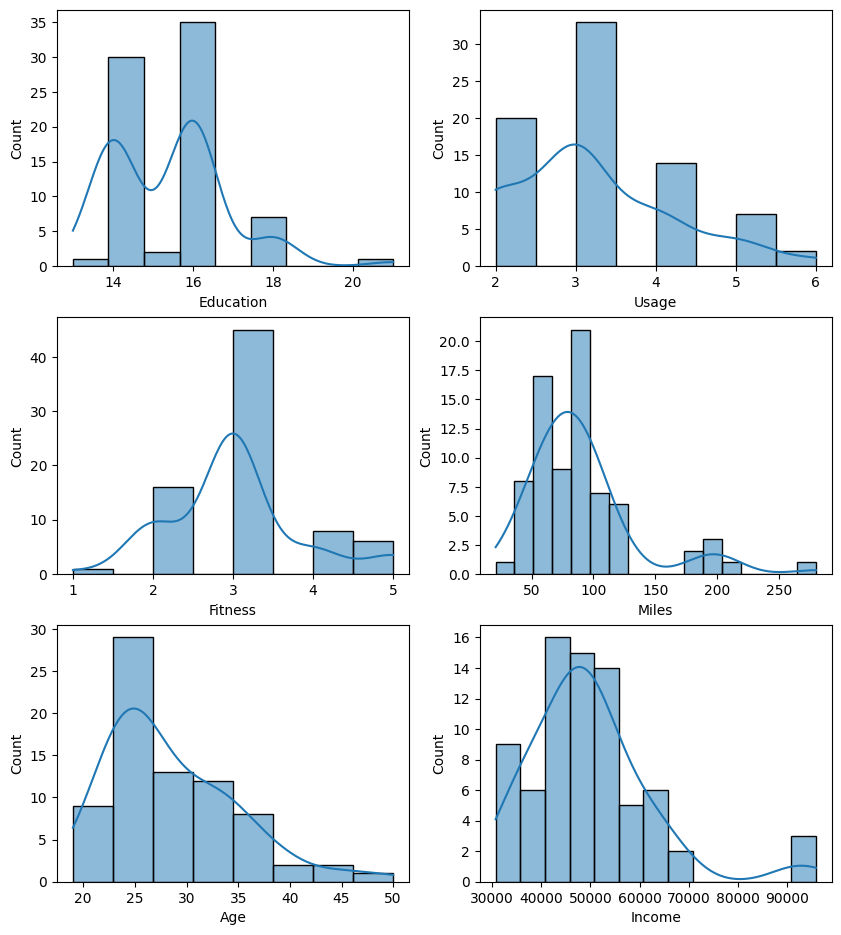

In [ ]:
# let's use subplot to unlist the column
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df_female_mask, x="Education", kde=True, ax=axis[0,0])
sns.histplot(data=df_female_mask, x="Usage", kde=True, ax=axis[0,1])
sns.histplot(data=df_female_mask, x="Fitness", kde=True, ax=axis[1,0])
sns.histplot(data=df_female_mask, x="Miles", kde=True, ax=axis[1,1])
sns.histplot(data=df_female_mask, x="Age", kde=True, ax=axis[2,0])
sns.histplot(data=df_female_mask, x="Income", kde=True, ax=axis[2,1])
plt.show()

Insights:

* Females with 14 and 16 years of eduction tend to buy tredmill.
* Females with usage 2-3 times a week tend to buy tredmill.
* Females with neutral fitness tend to buy tredmill.
* Females with Age 25 tend to buy more.
* Females with income 50000-60000 tend to buy more.

<Axes: xlabel='Product', ylabel='count'>

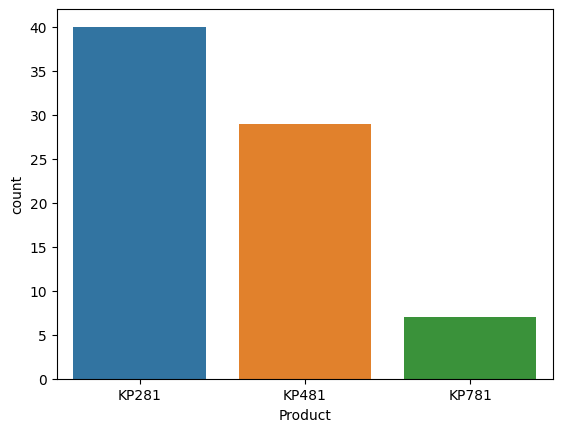

In [ ]:
sns.countplot(data=df_female_mask, x='Product')

Insights: KP281 is more preferred by females

<Axes: xlabel='MaritalStatus', ylabel='count'>

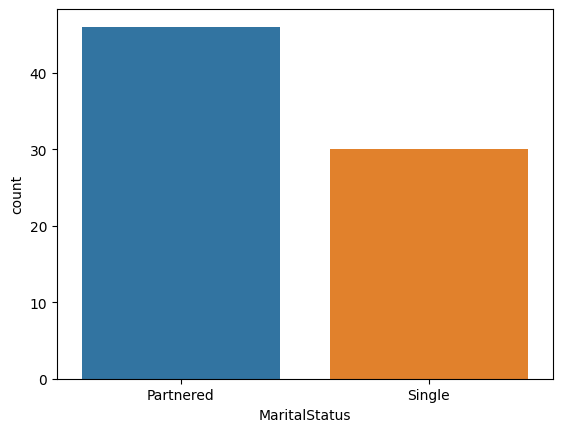

In [ ]:
sns.countplot(data=df_female_mask, x='MaritalStatus')


Insights: Females who are married tend to buy tredmill more than singles.

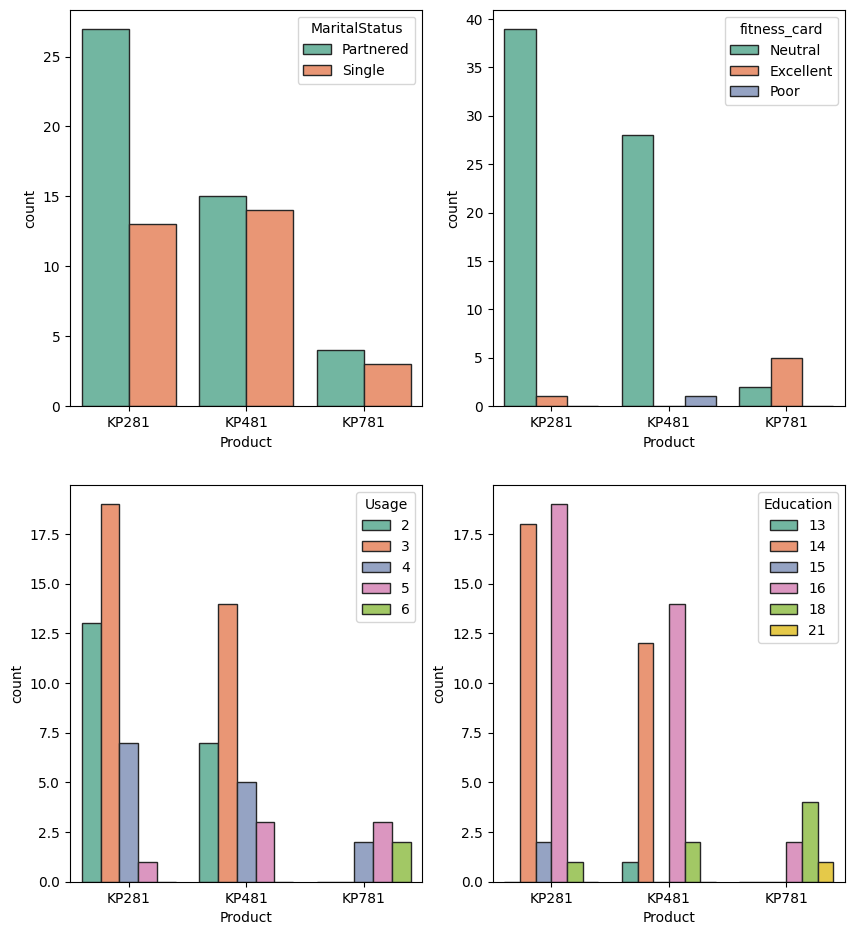

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.subplots_adjust(top=1.2)
sns.countplot(data=df_female_mask, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set2', ax=axis[0,0])
sns.countplot(data=df_female_mask, x='Product', hue='fitness_card', edgecolor="0.15", palette='Set2', ax=axis[0,1])
sns.countplot(data=df_female_mask, x='Product', hue='Usage', edgecolor="0.15", palette='Set2', ax=axis[1,0])
sns.countplot(data=df_female_mask, x='Product', hue='Education', edgecolor="0.15", palette='Set2', ax=axis[1,1])
plt.show()

Insights:
* Females who are married tend to buy KP281 than unmarried. KP781 is least preferred by married and single both.
* Maximum females with neutral fitness prefer KP281 and KP481
* Females with 2-3 times usage of tend to buy KP281 product.
* Least preferred product by females is KP781.

Hence we can say that KP281 is most preferred product due to low price.

# **Outlier Detection**

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
fitness_card     0
dtype: int64

In [ ]:
df.duplicated().sum()
# no duplication and no null values are there in data

0

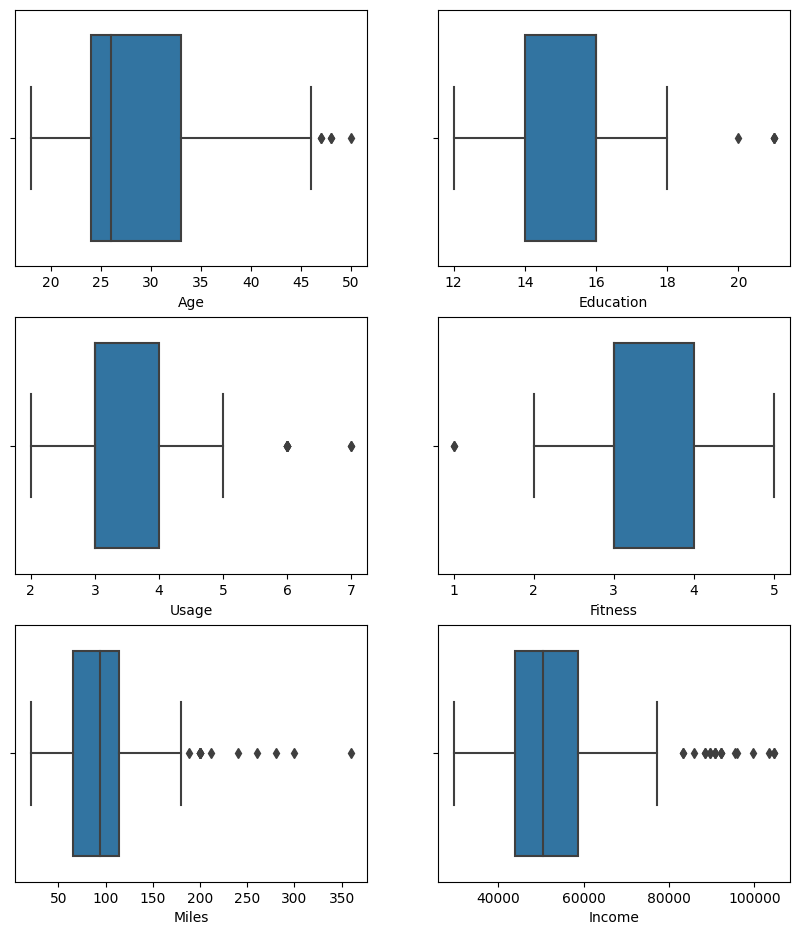

In [ ]:
# using boxplot let's see which feature has outliers
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=df, x="Age", orient='h', ax = axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax = axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax = axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax = axis[1,1])
sns.boxplot(data=df, x="Miles", orient='h', ax = axis[2,0])
sns.boxplot(data=df, x="Income", orient='h', ax = axis[2,1])
plt.show()

Insights:

1. Miles and Income have more outliers
2. Age , education,usage are having more outliers

<ipython-input-35-b7073a0a9f97>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')


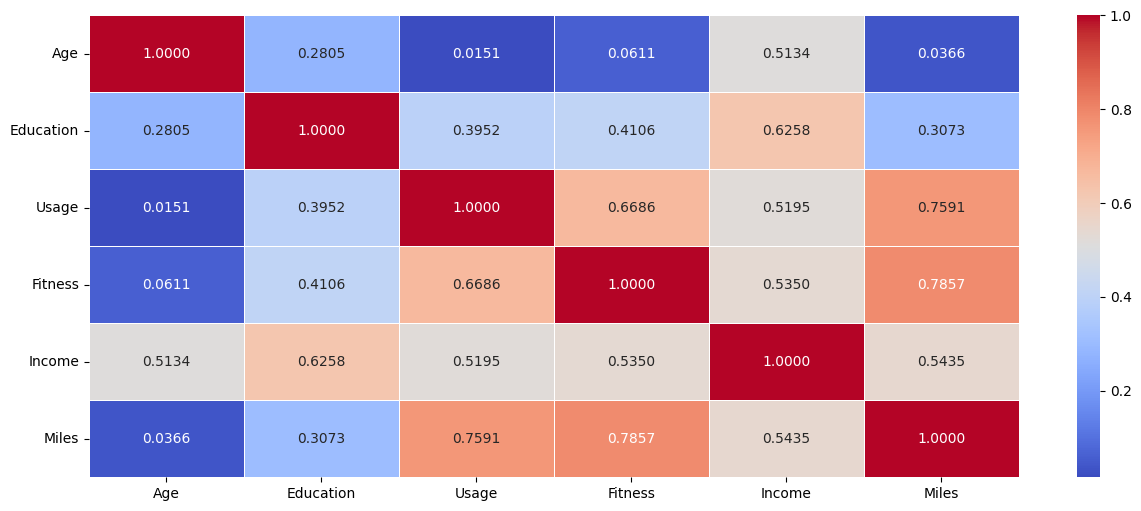

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.heatmap(data.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

In the above heatmap linear relationship between data points is evaluated

* Correlation between Age and Miles is 0.03
* Correlation between Education and Income is 0.62
* Correlation between Usage and Fitness is 0.66
* Correlation between Fitness and Age is 0.06
* Correlation between Income and Usage is 0.51
* Correlation between Miles and Age is 0.03

## Mean of each product by various factors

In [ ]:
a = df.groupby("Product")["Usage"].mean()
b = df.groupby("Product")["Education"].mean()
c = df.groupby("Product")["Age"].mean()
d = df.groupby("Product")["Fitness"].mean()
print("Mean usage of",a)
print()
print("Mean education qualification for the customer who purchased the",b)
print()
print("Mean age of the customer who purchased the",c)
print()
print("Mean fitness value of the customer per",d)
print()

Mean usage of Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

Mean education qualification for the customer who purchased the Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

Mean age of the customer who purchased the Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

Mean fitness value of the customer per Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64



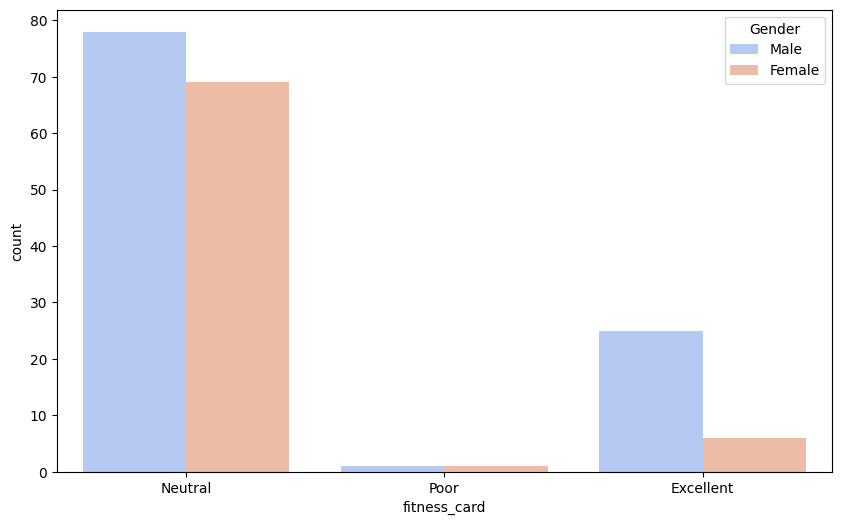

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = "fitness_card",hue = "Gender",palette = "coolwarm")
plt.show()

Insight: Both males and females have a good averge shape but as compared to females males have excellent shape

# Conditional and mariginal Probability

In [ ]:
pd.crosstab([df.Product],df.Gender,margins=True)
round(((pd.crosstab([df.Product],df.Gender,margins=True)/180)*100),2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


Mariginal Probability  = no.of outcome/ total number of  outcomes

**Insights**

* Probability of Female customer purchasing a product is 22.22
* Probability of Male customer Purchasiong a product is 57.78
* Probability of customer purchasing KP281 (entry level) is 44.44
* Probability of customer purchasing KP481 (Mid level)is 33.33
* Probability of customer purchasing KP781 (advanced level)is 22.22

In [ ]:
round((pd.crosstab([df.Product],df.Gender,margins=True,normalize = "columns")*100),2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


Conditional probabilities are those which depends on some condition like as we see that given product KP281 what is the prob that female customer bought KP281 product.

Insights:

* Prob(K281|Female) = 52 %
* Prob(K281|Male) = 38 %

-- Here we can clearly see that probability of buying KP281 product is more for females (52%) than males. So females may buy KP281 more in future.

* Prob(KP481|Female) = 38 %
* Prob(KP481|Male) = 29 %

-- Here we can clearly see that probability of buying KP481 product is slightly more for females (38%) than males. So females have slightly more possibility than males to buy KP481 Product.

* Prob(KP781|Female) = 9 %
* Prob(KP781|Male) = 31 %

-- Here we can clearly see that probability of buying KP781 product is more for males (31%) than females. So males have higher probability that they would prefer to buy KP781 in future.


It is recommended that in the future we can recommend males with KP281 and KP781 tredmills and recommend females with KP281 tredmill. In general, there is a higher probability of chance that Females could purchase KP281, but as we see Males also have a higher probability of purchasing KP281, but Males also tend to purchase KP781 with a higher probability.

# Customer Profiling

KP281

* KP281 is the most preferred product among all the three products.
* As KP281 is less expensive thst's why somehow people tend to but more.
* Easy to afford
* Partnered males and females tend to buy this product more than singles.
* Product is used 3-4 times in a week.
* Age group of 25-30 prefer these product more basically more younger people prefer this product more.
* People carrying 14-16 years of education prefer these product more than others.
* Average Income in between (40-50)K prefer this product more.


KP481

* KP481 is the second most popular product.
* This product is an intermediate level.
* More females prefer this product than males.
* Probability of Female customer buying KP481 is significantly higher than male.
* IN general people prefer to use this product 3 times a week.
* More Partnered customers prefer this product.
* People with netral fitness prefer this product more.
* females tend to buy this product slightly more than males but there are high chances that this could change because the margin is low.


KP781

* Customer use this product to cover more distance.
* Males prefer this product more than females.
* There are high chances that males who are married would buy this product more.
* As the product is expensive less people have bought it, Out of 180 only 40 people bought this product.
*  count of males use this product is higher than females as they tend to buy this product more frequently.
* Average usage of this product is 4 to 5 times a week.
* Customer having excellent fitness prefer this product more.

# Recommendations

1. KP281 is the most popular product overall, therefore if someone is looking to purchase a treadmill, we may recommend this model based on data statistics.
2. Due to its affordability, KP481 is the second most popular product and is readily available. Basically, if someone comes in to buy a treadmill, we can start selling this product first. As KP281 is less expensive than KP481, this may happen that he/she would ended up buying less expensive one.
3. As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.
4. KP781 could be sold internationally to get better sales.
5. Target audiance is below 40 years of age for these product.
6. We can use social media and influencers to advertise these products because social media is expanding so rapidly. Thus, more people would be drawn in.
7. We can also try to expand the market for people above 40 years of age.
8. People who are extensively doing excersive and have good fitness can be recommmended with KP781 product as it will help us growing the business profit more. As KP781 is the most expensive product among all.
9. We can even set up numerous online and offline fitness campaigns with the goal of promoting daily exercise as a way to improve fitness and a healthy lifestyle. Accordingly, we may market our product to customers and explain all of its advantages.